In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df = df.drop(columns = ['id'], axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.891862,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.891862,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

X = df[[col for col in features]]
y = df['stroke']


In [6]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7771, 10) (1943, 10) (7771,) (1943,)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

params_grid = {
    'max_depth': [25,26,27,28,29,30,31,32,33,34,35],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = params_grid,
    cv = 5,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)


{'criterion': 'log_loss', 'max_depth': 29, 'max_features': 'log2', 'max_leaf_nodes': 1200}


In [10]:
model = DecisionTreeClassifier(max_features = 'log2', max_depth = 29, max_leaf_nodes = 1200, criterion = 'log_loss')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=29, max_features='log2',
                       max_leaf_nodes=1200)

In [11]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 49.00
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_8 <= 24.11
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_1 <= 46.40
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  46.40
|   |   |   |   |   |   |--- feature_9 <= 1.50
|   |   |   |   |   |   |   |--- feature_5 <= 1.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  1.00
|   |   |   |   |   |   |   |   |--- feature_7 <= 69.43
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  69.43
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_5 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  1.50
|   |   |   | 

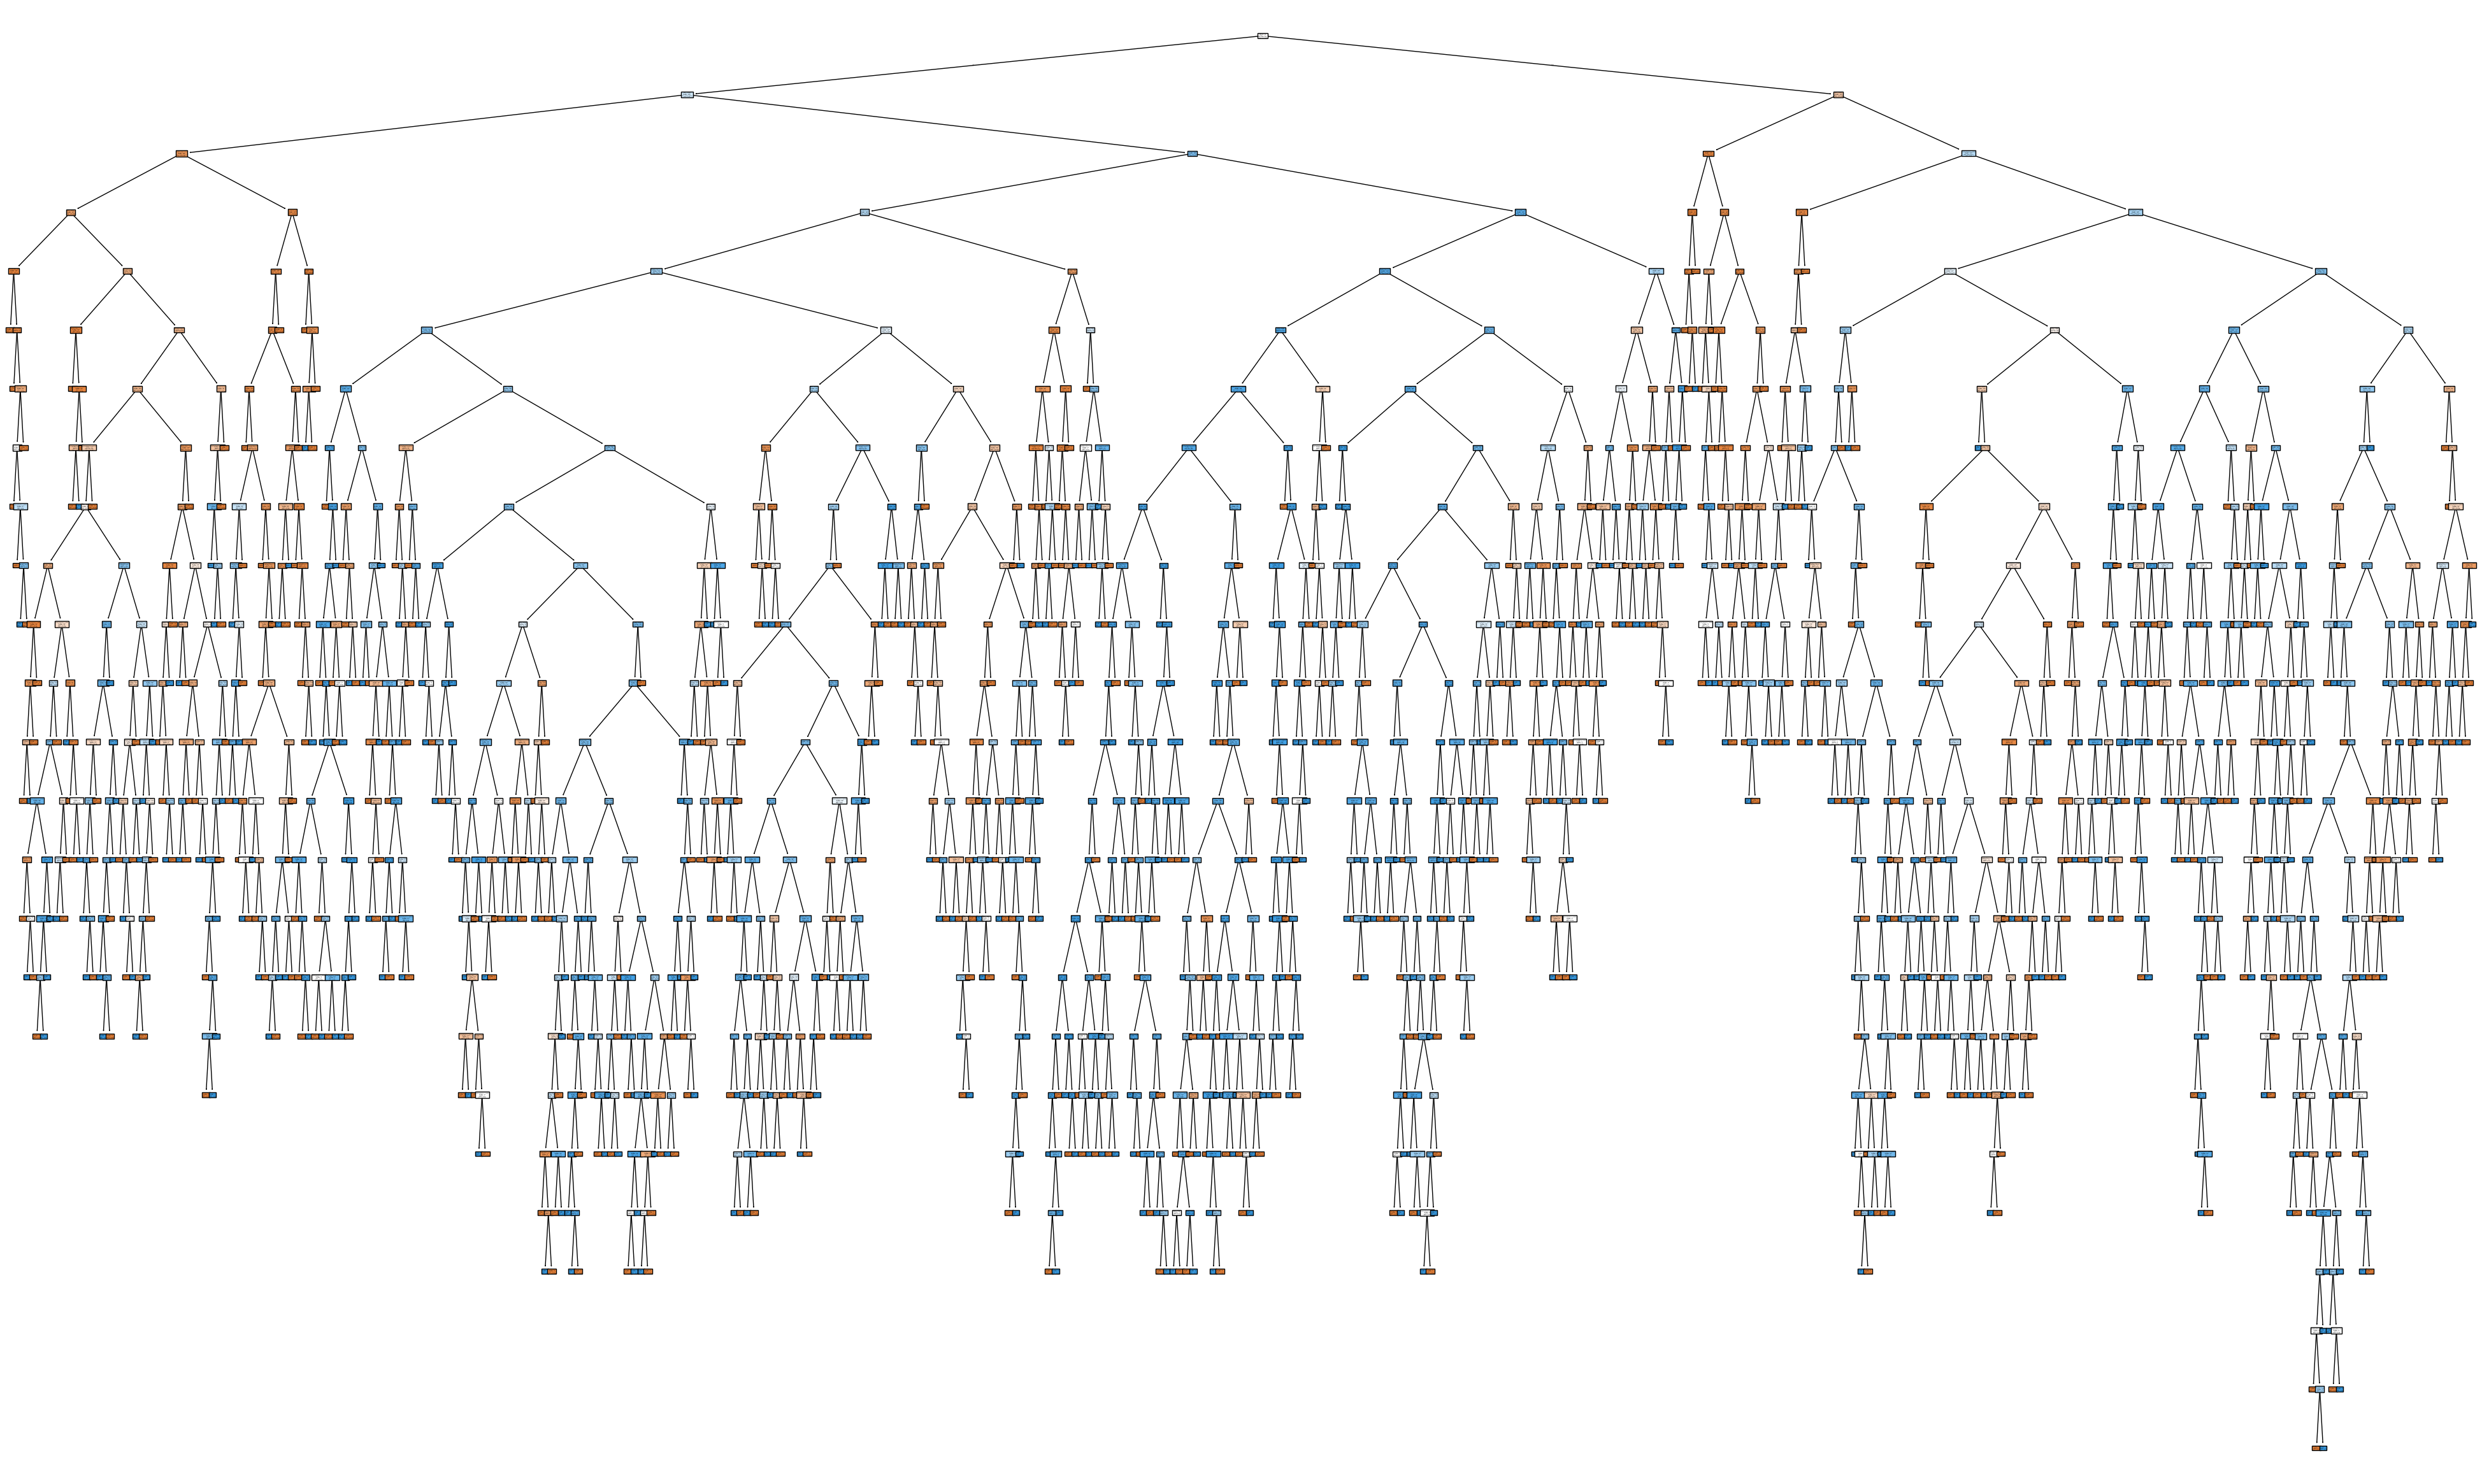

In [12]:
import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(50,30))
_ = tree.plot_tree(model, feature_names=features,class_names=["No Stroke", "Stroke"], filled= True)

In [13]:
print('Training accuracy on Decision Tree: ', model.score(X_train, y_train) * 100, '%')
print('Testing accuracy on Decision Tree: ', model.score(X_test, y_test) * 100, '%')

Training accuracy on Decision Tree:  100.0 %
Testing accuracy on Decision Tree:  89.24343798250128 %


In [14]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, model.predict(X_test))
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print("Confusion Matrix: \n", cm)
print("Model testing accuracy:", ((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))*100, "%", sep=' ')

Confusion Matrix: 
 [[834 129]
 [ 80 900]]
Model testing accuracy: 89.24343798250128 %


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       963
           1       0.87      0.92      0.90       980

    accuracy                           0.89      1943
   macro avg       0.89      0.89      0.89      1943
weighted avg       0.89      0.89      0.89      1943



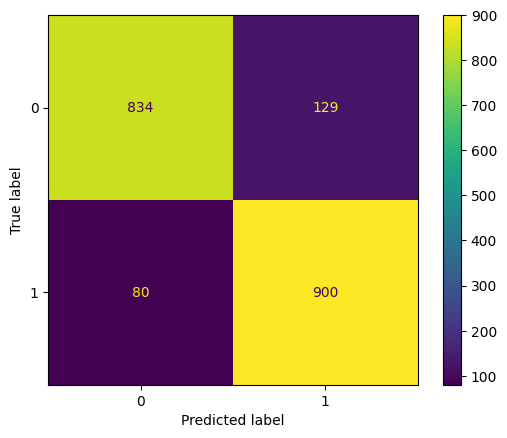

In [15]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, model.predict(X_test)))
cf = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cf.plot()